### Geração de Patches em Espiral


In [1]:
from PIL import Image
import numpy as np
import random
random.seed(10)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle

In [2]:
path_image = "../../data/base_recortada/ASC-H/10.png"
im = Image.open(path_image)
im.format, im.size, im.mode

('PNG', (90, 90), 'RGB')

In [3]:
def visualize_patch_centers(image, centers, patch_size):
    fig, ax = plt.subplots(1)
    
    image_np = np.array(image)
    
    if image_np.max() > 1:
        image_np = image_np / 255.0
    
    ax.imshow(image_np)
    
    patch_height, patch_width = patch_size
    
    for (w, h) in centers:
        rect = patches.Rectangle(
            (w - patch_width // 2, h - patch_height // 2), 
            patch_width, patch_height,
            linewidth=1, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)
        plt.plot(w, h, marker='v', color='r')
    
    ax.set_xlim([0, image_np.shape[1]])
    ax.set_ylim([image_np.shape[0], 0])
    plt.axis('off')
    plt.show()

[(112, 112), (114, 114), (107, 109), (118, 115), (103, 109), (121, 113), (101, 112), (124, 110), (99, 116), (125, 106), (99, 120), (124, 102), (100, 124), (121, 97), (104, 128), (117, 94), (108, 131), (112, 91), (114, 133), (106, 91), (121, 133), (100, 92), (127, 130), (94, 95), (133, 126), (89, 101), (137, 120), (86, 107), (139, 113), (84, 115), (140, 105), (85, 123), (137, 97), (89, 131), (133, 90), (94, 137), (126, 84), (102, 142), (118, 80), (110, 145), (109, 79), (120, 145), (99, 80), (129, 142), (90, 84), (138, 137), (82, 90), (145, 129), (77, 99), (149, 119), (73, 109), (151, 109), (73, 120), (149, 97), (77, 131), (145, 87), (83, 141), (137, 78), (92, 149), (127, 71), (103, 154), (115, 68), (115, 156), (103, 68), (128, 154), (90, 71), (139, 149), (79, 78), (150, 141), (70, 88), (157, 129), (64, 101), (161, 116), (62, 115), (161, 102), (64, 129), (157, 88), (69, 142), (150, 75), (79, 153), (139, 65), (92, 162), (125, 59), (106, 167), (109, 56), (122, 167), (94, 58), (137, 163), (

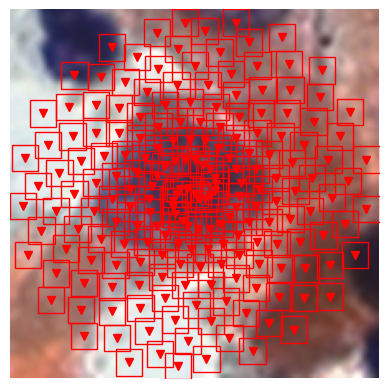

Quantidade de centros dentro da imagem: 196


In [11]:
def calculate_prox_coordenada_spiral(ponto, r, theta, img_size=224, base_radius=4, angle_increment=np.pi/4, patch_size=16):
    half_patch = patch_size // 2 

    x_new = ponto[0] + r * np.cos(theta)
    y_new = ponto[1] + r * np.sin(theta)

    x_new = max(half_patch, min(img_size - half_patch, x_new))
    y_new = max(half_patch, min(img_size - half_patch, y_new))

    radius_increment = max(1, base_radius / (1 + 0.1 * r))
    
    r += radius_increment
    theta += angle_increment

    return (round(x_new, 1), round(y_new, 1)), r, theta




px_inicial = (112,112)

center = []


value, r, theta = calculate_prox_coordenada_spiral(px_inicial, 0, 0)
center.append(value)

while len(center) < 196:

  value, r, theta = calculate_prox_coordenada_spiral(center[-1], r, theta, img_size=224, base_radius=7, angle_increment=3)
  
  if (value[0] >=0 and value[1] >= 0) and (value[0] <= 224 and value[1] <= 224)  :
    
      center.append(value)


center = [(int(x), int(y)) for x, y in center]

print(center)
resized_image = im.resize((224,224))
visualize_patch_centers(resized_image, center, (16,16))  


cont = 0
for each in center:
  if (each[0] <= 224 and each[1] <= 224) and (each[0] >= 0 and each[1] >= 0):
    cont += 1
  
print(f"Quantidade de centros dentro da imagem: {cont}")

Salvando centers em arquivo pickle

In [12]:
with open('../../data/centros_pre_salvos/espiral_centers.pkl', 'wb') as handle:
    pickle.dump(center, handle, protocol=pickle.HIGHEST_PROTOCOL)